In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2024-09-01 12:22:22--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-09-01 12:22:22 (72.8 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [2]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [3]:
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, walk_through_dir

In [7]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

unzip_data("10_food_classes_10_percent.zip")

--2024-09-01 09:46:15--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.207, 64.233.170.207, 142.251.175.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.2’

10_food_classes_10_ 100%[===================>] 160.74M  23.1MB/s    in 8.0s    

2024-09-01 09:46:23 (20.2 MB/s) - ‘10_food_classes_10_percent.zip.2’ saved [168546183/168546183]



In [5]:
walk_through_dir("/content/10_food_classes_10_percent")

There are 2 directories and 0 images in '/content/10_food_classes_10_percent'.
There are 10 directories and 0 images in '/content/10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '/content/10_food_classes_10

In [6]:
train_dir='/content/10_food_classes_10_percent/train'
test_dir='/content/10_food_classes_10_percent/test'

In [7]:
from re import T
import tensorflow as tf
IMG_SIZE=(224,224)
BATCH_SIZE=32
train_data_10_percent=tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                          label_mode='categorical',
                                                                          batch_size=BATCH_SIZE,
                                                                          image_size=IMG_SIZE)

test_data=tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                              label_mode='categorical',
                                                              image_size=IMG_SIZE,
                                                              batch_size=BATCH_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [8]:
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [9]:
len(train_data_10_percent.class_names)

10

In [10]:
for images,labels in train_data_10_percent.take(1):
  print(images,labels)
  print(images[0].shape)

tf.Tensor(
[[[[2.24658157e+02 1.37301025e+02 2.60867348e+01]
   [2.25188782e+02 1.39234695e+02 3.73775520e+01]
   [2.35000000e+02 1.47719391e+02 4.56938782e+01]
   ...
   [5.70914793e+00 6.70914793e+00 4.28527832e-01]
   [5.33162785e+00 4.33162785e+00 1.42883301e-01]
   [4.22961426e+00 4.22961426e+00 2.94396973e+00]]

  [[2.30357147e+02 1.39454086e+02 3.30969391e+01]
   [2.30714294e+02 1.42857147e+02 4.40051041e+01]
   [2.41428574e+02 1.55173462e+02 5.60306129e+01]
   ...
   [7.04081964e+00 7.98469543e+00 4.13223267e-01]
   [6.99998665e+00 5.99998665e+00 1.20410585e+00]
   [4.57139397e+00 4.71425056e+00 3.21432066e+00]]

  [[2.31198975e+02 1.43857132e+02 2.33622456e+01]
   [2.27122452e+02 1.43897964e+02 3.60306168e+01]
   [2.33591827e+02 1.52734695e+02 5.58112259e+01]
   ...
   [7.73982239e+00 7.61738586e+00 2.14263916e-01]
   [7.98469114e+00 7.71427250e+00 5.96969843e-01]
   [4.42853642e+00 6.42853642e+00 2.14289188e+00]]

  ...

  [[1.39989792e+02 1.08576508e+02 7.97142715e+01]
   [1

## Model 0: Building the feature extraction transfer learning model using keras functional API
1. Sequential API allows to build models sequentially
2. Functional API gives more flexibility

In [11]:
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model.trainable=False

inputs=tf.keras.layers.Input(shape=(224,224,3),name='input_layer')

#If you are using a model like ResNet50V2 you will need to rescale it or normalize not needed for efficient net v2
#x=tf.keras.layers.experimental.preprocessing.Rescaling(1/255.0)(inputs) Not needed here!

x=base_model((inputs))
print(f"Shape after passing through base model: {x.shape}")

#Aggregating the most important information and reducing the dimension also
x=tf.keras.layers.GlobalAveragePooling2D(name='global_average_pooling_layer')(x)
print(f"Shape After Global Average Pooling: {x.shape}")

#Create the output activation layer
outputs=tf.keras.layers.Dense(10,activation='softmax',name='output_layer')(x)

#Combine both inputs and ouputs together
model_0=tf.keras.Model(inputs,outputs)

model_0.compile(loss='categorical_crossentropy',
                optimizer="Adam",
                metrics=['accuracy'])

history_model_0=model_0.fit(train_data_10_percent,epochs=5,steps_per_epoch=len(train_data_10_percent),
            validation_data=test_data,validation_steps=int(0.25*len(test_data)),
                    callbacks=[create_tensorboard_callback(dir_name='transfer_learning',
                                                           experiment_name='10_percent_feature_extraction')]
)

24274472/24274472 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Shape after passing through base model: (None, 7, 7, 1280)
Shape After Global Average Pooling: (None, 1280)
Saving TensorBoard log files to: transfer_learning/10_percent_feature_extraction/20240901-072231
Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3191 - loss: 2.0721

KeyboardInterrupt: 

In [ ]:
model_0.evaluate(test_data)

In [ ]:
len(base_model.layers)

In [ ]:
for layer_name,layer in enumerate(base_model.layers):
  print(layer_name,layer.name)

In [ ]:
base_model.summary()

In [ ]:
model_0.summary()

In [ ]:
plot_loss_curves(history_model_0)

## Getting a feature vector from the trained model
Global Average Pooling 2d Layer
1. shape=(None,7,7,1280)
2. But after passing through Global Average Pooling 2d our shape turns into (None,1280)
3. Let's try to pass some feature vector of shape (1,4,4,3) and then pass it to GlobalAveragePooling 2D

In [ ]:
input_shape=(1,4,4,3)
tf.random.set_seed(42)
input_tensor=tf.random.normal(input_shape)
print(f'Input tensor is {input_tensor}')
print(f"Input shape is {input_tensor.shape}")

In [ ]:
global_average_pooling_2d=tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(f"Shape after Global Average Pooling 2D is {global_average_pooling_2d.shape}")
print(f"Tensor after applying Global Average Pooling 2D is {global_average_pooling_2d}")

In [5]:
tf.reduce_mean(input_tensor,axis=[1,2]).numpy()

NameError: name 'tf' is not defined

In [7]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

--2024-09-01 08:51:52--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.4.207, 172.253.118.207, 74.125.200.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.4.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M  21.4MB/s    in 7.1s    

2024-09-01 08:52:00 (18.0 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [9]:
import tensorflow as tf

In [9]:
unzip_data('10_food_classes_1_percent.zip')

In [10]:
train_dir_1_percent='/content/10_food_classes_1_percent/train'
test_dir='/content/10_food_classes_1_percent/test'

In [11]:
walk_through_dir('10_food_classes_1_percent')

In [12]:
IMAGE_SIZE=(224,224)
BATCH_SIZE=32

train_data_1_percent=tf.keras.preprocessing.image_dataset_from_directory(train_dir_1_percent,
                                                                         label_mode='categorical',
                                                                         image_size=IMAGE_SIZE,
                                                                         batch_size=BATCH_SIZE)

test_data=tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                              label_mode='categorical',
                                                              image_size=IMAGE_SIZE,
                                                              batch_size=BATCH_SIZE)

NotFoundError: Could not find directory /content/10_food_classes_1_percent/train

## Let's add data augmentation to our model

`tf.keras.experimental.preprocessing()`

In [13]:
from tensorflow import keras
from tensorflow.keras import layers
data_augmentation = tf.keras.Sequential([
    layers.Resizing(224, 224),  # Ensuring resizing to the correct shape
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    # Any other augmentation you wish to add
])

In [14]:
### Preprocessing of images happens in GPU rather than CPU
### Data Augmentation happens only during training so no problem:


import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random

target_class=random.choice(train_data_1_percent.class_names)
target_dir="10_food_classes_1_percent/train/"+target_class
random_image=random.choice(os.listdir(target_dir))
random_image_path=target_dir+"/"+random_image
img=mpimg.imread(random_image_path)
plt.imshow(img)
plt.title(f"Original random image from class {target_class}")
plt.axis(False)

augmented_img = data_augmentation(img,training=True) # data augmentation model requires shape (None, height, width, 3)
plt.figure()
plt.imshow(tf.squeeze(augmented_img)/255.) # requires normalization after augmentation
plt.title(f"Augmented random image from class: {target_class}")
plt.axis(False);


NameError: name 'train_data_1_percent' is not defined

In [20]:
# Define the data augmentation layer with correct input size
data_augmentation = tf.keras.Sequential([
    layers.Resizing(224, 224),  # Ensuring resizing to the correct shape
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    # Any other augmentation you wish to add
])

base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model.trainable = False

input_shape=(224,224,3)
# Define the input layer


inputs = layers.Input(shape=input_shape, name="input_layer")

# Apply data augmentation to the inputs
x = data_augmentation(inputs)

# Use the base model
x = base_model(x, training=False)

# Pool output features of base model
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

# Define the output layer
outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)

# Create the model
model_1 = keras.Model(inputs, outputs)

# Compile the model
model_1.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1_percent = model_1.fit(train_data_1_percent,
                    epochs=5,
                    steps_per_epoch=len(train_data_1_percent),
                    validation_data=test_data,
                    validation_steps=int(0.25* len(test_data)),
                    callbacks=[create_tensorboard_callback("transfer_learning", "1_percent_data_aug")])


Saving TensorBoard log files to: transfer_learning/1_percent_data_aug/20240901-085422
Epoch 1/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step - accuracy: 0.0969 - loss: 2.3596 - val_accuracy: 0.1957 - val_loss: 2.2165
Epoch 2/5


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 373ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.2270 - val_loss: 2.1982
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 570ms/step - accuracy: 0.1970 - loss: 2.1704 - val_accuracy: 0.2780 - val_loss: 2.1033
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 433ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.3141 - val_loss: 2.0802
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 3s/step - accuracy: 0.3693 - loss: 1.9447 - val_accuracy: 0.3088 - val_loss: 1.9804


In [21]:
model_1.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_2 (Sequential)            │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetv2-b0 (Functional)       │ (None, 7, 7, 1280)          │       5,919,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling_layer         │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 10)                  │          12,810 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,957,744 (22.73 MB)

 Trainable params: 12,810 (50.04 KB)

 Non-trainable params: 5,919,312 (22.58 MB)

 Optimizer params: 25,622 (100.09 KB)

In [22]:
model_1.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 85ms/step - accuracy: 0.3742 - loss: 1.9787


[1.978947639465332, 0.3747999966144562]

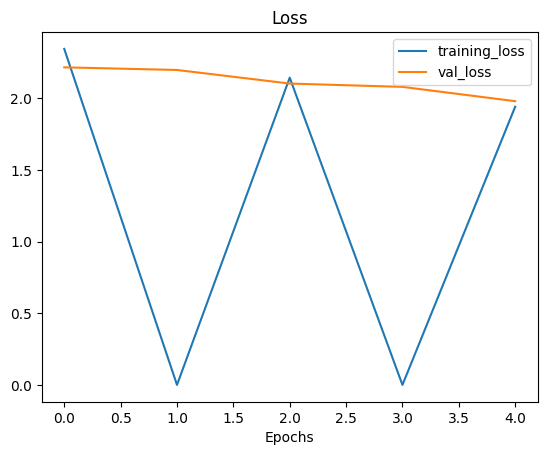

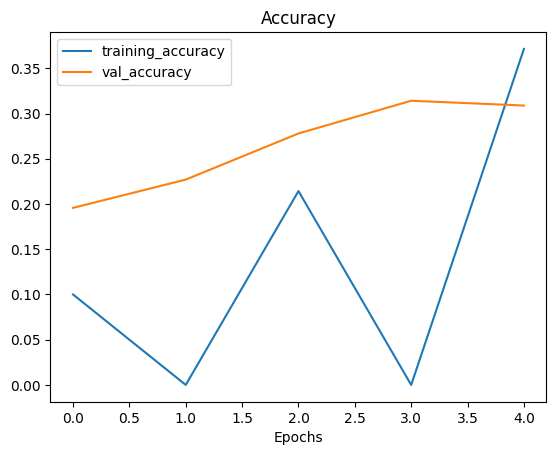

In [23]:
plot_loss_curves(history_1_percent)

In [17]:
from tensorflow.keras import layers
from tensorflow import keras

In [8]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

unzip_data("10_food_classes_10_percent.zip")

train_dir='/content/10_food_classes_10_percent/train'
test_dir='/content/10_food_classes_10_percent/test'

--2024-09-01 12:23:05--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.125.207, 142.251.183.207, 142.251.184.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.125.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.1’

10_food_classes_10_ 100%[===================>] 160.74M   116MB/s    in 1.4s    

2024-09-01 12:23:07 (116 MB/s) - ‘10_food_classes_10_percent.zip.1’ saved [168546183/168546183]



In [13]:
BATCH_SIZE=32
IMAGE_SIZE=(224,224)

import tensorflow as tf
train_data_10_percent=tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                          label_mode='categorical',
                                                                          batch_size=BATCH_SIZE,
                                                                          image_size=IMAGE_SIZE)
test_data=tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                              label_mode='categorical',
                                                              batch_size=BATCH_SIZE,
                                                              image_size=IMAGE_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [14]:
input_shape=(224,224,3)

base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model.trainable = False
inputs=layers.Input(shape=input_shape,name='input_layer')


data_augmentation=tf.keras.Sequential([
    layers.Resizing(224,224),
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2),
    layers.RandomZoom(0.2)
],name='data_augmentation_layer')

x=data_augmentation(inputs)
x=base_model(x)

x=layers.GlobalAveragePooling2D(name='global_average_pooling_layer')(x)
outputs=layers.Dense(10,activation='softmax')(x)

model_2=keras.Model(inputs,outputs)
model_2.compile(loss=tf.keras.losses.categorical_crossentropy,
                optimizer='Adam',
                metrics=['accuracy'])



In [15]:
model_2.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ data_augmentation_layer (Sequential) │ (None, None, None, 3)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetv2-b0 (Functional)       │ (None, None, None, 1280)    │       5,919,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling_layer         │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │          12,810 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,932,122 (22.63 MB)

 Trainable params: 12,810 (50.04 KB)

 Non-trainable params: 5,919,312 (22.58 MB)

# Model Checkpoint Callback
This saves our whole model or just the weights during training. So that we can come and start where we left off.

In [41]:
 # Set the checkpoint path
checkpoint_path='ten_percent_model_checkpoints.weights.h5'

checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                       save_weights_only=True,
                                                       save_best_only=True,
                                                       save_freq="epoch",
                                                       verbose=1)

In [42]:
hitory_10_percent_data_aug=model_2.fit(train_data_10_percent,epochs=5,
            validation_data=test_data,validation_steps=int(0.25*len(test_data)),
            callbacks=[create_tensorboard_callback(dir_name='transfer_learning',
                                                   experiment_name='10_percent_data_aug'),checkpoint_callback])

Saving TensorBoard log files to: transfer_learning/10_percent_data_aug/20240901-130307
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5456 - loss: 1.7406
Epoch 1: val_loss improved from inf to 1.40238, saving model to ten_percent_model_checkpoints.weights.h5
24/24 ━━━━━━━━━━━━━━━━━━━━ 113s 4s/step - accuracy: 0.5453 - loss: 1.7400 - val_accuracy: 0.7467 - val_loss: 1.4024


In [43]:
model_2.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 146s 2s/step - accuracy: 0.7357 - loss: 1.4090


[1.4226619005203247, 0.7152000069618225]

In [44]:
model_2.load_weights(checkpoint_path)

In [45]:
model_2.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 161s 2s/step - accuracy: 0.7233 - loss: 1.4180


[1.4226617813110352, 0.7152000069618225]

In [46]:
model_2.layers

[<InputLayer name=input_layer, built=True>,
 <Sequential name=data_augmentation_layer, built=True>,
 <Functional name=efficientnetv2-b0, built=True>,
 <GlobalAveragePooling2D name=global_average_pooling_layer, built=True>,
 <Dense name=dense_1, built=True>]

In [47]:
for layer in model_2.layers:
  print(layer,layer.trainable)

<InputLayer name=input_layer, built=True> True
<Sequential name=data_augmentation_layer, built=True> True
<Functional name=efficientnetv2-b0, built=True> True
<GlobalAveragePooling2D name=global_average_pooling_layer, built=True> True
<Dense name=dense_1, built=True> True


In [48]:
for i, layer in enumerate(model_2.layers[2].layers):
  print(i,layer.name,layer.trainable)

0 input_layer_3 False
1 rescaling_2 False
2 normalization_2 False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block2a_expand_conv False
10 block2a_expand_bn False
11 block2a_expand_activation False
12 block2a_project_conv False
13 block2a_project_bn False
14 block2b_expand_conv False
15 block2b_expand_bn False
16 block2b_expand_activation False
17 block2b_project_conv False
18 block2b_project_bn False
19 block2b_drop False
20 block2b_add False
21 block3a_expand_conv False
22 block3a_expand_bn False
23 block3a_expand_activation False
24 block3a_project_conv False
25 block3a_project_bn False
26 block3b_expand_conv False
27 block3b_expand_bn False
28 block3b_expand_activation False
29 block3b_project_conv False
30 block3b_project_bn False
31 block3b_drop False
32 block3b_add False
33 block4a_expand_conv False
34 block4a_expand_bn False
35 block4a_expand_activation False
36 block4a_dw

In [49]:
print(len(model_2.layers[2].trainable_variables))

10


In [50]:
base_model.trainable=True

for layer in base_model.layers[:-10]:
  layer.trainable=False


model_2.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=['accuracy'])

In [51]:
for layer in base_model.layers:
  print(layer,layer.trainable)

<InputLayer name=input_layer_3, built=True> False
<Rescaling name=rescaling_2, built=True> False
<Normalization name=normalization_2, built=True> False
<Conv2D name=stem_conv, built=True> False
<BatchNormalization name=stem_bn, built=True> False
<Activation name=stem_activation, built=True> False
<Conv2D name=block1a_project_conv, built=True> False
<BatchNormalization name=block1a_project_bn, built=True> False
<Activation name=block1a_project_activation, built=True> False
<Conv2D name=block2a_expand_conv, built=True> False
<BatchNormalization name=block2a_expand_bn, built=True> False
<Activation name=block2a_expand_activation, built=True> False
<Conv2D name=block2a_project_conv, built=True> False
<BatchNormalization name=block2a_project_bn, built=True> False
<Conv2D name=block2b_expand_conv, built=True> False
<BatchNormalization name=block2b_expand_bn, built=True> False
<Activation name=block2b_expand_activation, built=True> False
<Conv2D name=block2b_project_conv, built=True> False
<B

In [52]:
for i,layer in enumerate(model_2.layers[2].layers):
  print(i,layer,layer.trainable)

0 <InputLayer name=input_layer_3, built=True> False
1 <Rescaling name=rescaling_2, built=True> False
2 <Normalization name=normalization_2, built=True> False
3 <Conv2D name=stem_conv, built=True> False
4 <BatchNormalization name=stem_bn, built=True> False
5 <Activation name=stem_activation, built=True> False
6 <Conv2D name=block1a_project_conv, built=True> False
7 <BatchNormalization name=block1a_project_bn, built=True> False
8 <Activation name=block1a_project_activation, built=True> False
9 <Conv2D name=block2a_expand_conv, built=True> False
10 <BatchNormalization name=block2a_expand_bn, built=True> False
11 <Activation name=block2a_expand_activation, built=True> False
12 <Conv2D name=block2a_project_conv, built=True> False
13 <BatchNormalization name=block2a_project_bn, built=True> False
14 <Conv2D name=block2b_expand_conv, built=True> False
15 <BatchNormalization name=block2b_expand_bn, built=True> False
16 <Activation name=block2b_expand_activation, built=True> False
17 <Conv2D nam

In [53]:
model_2.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ data_augmentation_layer (Sequential) │ (None, None, None, 3)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetv2-b0 (Functional)       │ (None, None, None, 1280)    │       5,919,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling_layer         │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │          12,810 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,932,122 (22.63 MB)

 Trainable params: 594,490 (2.27 MB)

 Non-trainable params: 5,337,632 (20.36 MB)

## As we are fine tuning we set the learning rate to be 0.0001

In [56]:
fine_tune_epochs=10
history_fine_tune_10=model_2.fit(train_data_10_percent,
                                 epochs=fine_tune_epochs,
                                 initial_epoch=hitory_10_percent_data_aug.epoch[-1],
                                 validation_data=test_data,
                                 validation_steps=int(0.25*len(test_data)),
                                 callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                                        experiment_name="10_percent_fine_tuning")])

Saving TensorBoard log files to: transfer_learning/10_percent_fine_tuning/20240901-131806
Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 120s 4s/step - accuracy: 0.6361 - loss: 1.5731 - val_accuracy: 0.7681 - val_loss: 1.1739
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 136s 4s/step - accuracy: 0.6974 - loss: 1.3842 - val_accuracy: 0.7648 - val_loss: 1.0283
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 137s 4s/step - accuracy: 0.7288 - loss: 1.2135 - val_accuracy: 0.7401 - val_loss: 0.9160
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 165s 5s/step - accuracy: 0.7120 - loss: 1.1716 - val_accuracy: 0.7812 - val_loss: 0.8496
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 92s 3s/step - accuracy: 0.7343 - loss: 1.0392 - val_accuracy: 0.7647 - val_loss: 0.9537
Epoch 6/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


24/24 ━━━━━━━━━━━━━━━━━━━━ 110s 4s/step - accuracy: 0.7799 - loss: 0.9177 - val_accuracy: 0.8586 - val_loss: 0.6336
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 171s 5s/step - accuracy: 0.7902 - loss: 0.9255 - val_accuracy: 0.7944 - val_loss: 0.6748
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 111s 4s/step - accuracy: 0.7946 - loss: 0.8852 - val_accuracy: 0.8109 - val_loss: 0.6382
Epoch 9/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 94s 4s/step - accuracy: 0.7816 - loss: 0.8591 - val_accuracy: 0.8224 - val_loss: 0.6067
Epoch 10/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 151s 4s/step - accuracy: 0.8029 - loss: 0.8348 - val_accuracy: 0.8676 - val_loss: 0.5262


In [58]:
def compare_history(original_history,new_history,initial_epochs=5):
  acc=original_history.history['accuracy']
  loss=original_history.history['loss']

  val_acc=new_history.history['val_accuracy']
  val_loss=new_history.history['val_loss']

  total_acc=acc+new_history.history['accuracy']
  total_loss=loss+new_history.history['loss']

  total_val_acc=val_acc+new_history.history['val_accuracy']
  total_val_loss=val_loss+new_history.history['val_loss']

  plt.figure(figsize=(8,8))
  plt.subplot(2,1,1)
  plt.plot(total_acc,label='Training Accuracy')
  plt.plot(total_val_acc,label='Validation Accuracy')
  plt.plot([initial_epochs-1,initial_epochs-1],plt.ylim(),label='Start Fine Tuning')
  plt.legend(loc='lower right')
  plt.title("Training and Validation Accuracy")

  plt.figure(figsize=(8,8))
  plt.subplot(2,1,2)
  plt.plot(total_loss,label='Training Loss')
  plt.plot(total_val_loss,label='Validation Loss')
  plt.plot([initial_epochs-1,initial_epochs-1],plt.ylim(),label='Start Fine Tuning')
  plt.legend(loc='lower right')
  plt.title("Training and Validation Loss")

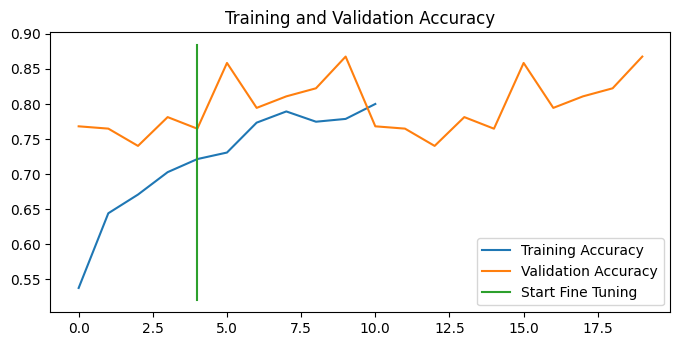

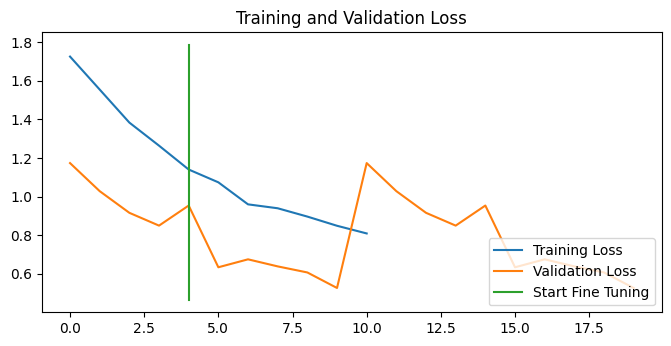

In [60]:
import matplotlib.pyplot as plt

compare_history(hitory_10_percent_data_aug,
                history_fine_tune_10,initial_epochs=5)

##Model 4

In [61]:

# Download and unzip 10 classes of data with all images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
unzip_data("10_food_classes_all_data.zip")

# Setup data directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

--2024-09-01 13:41:20--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.181.207, 173.194.193.207, 173.194.194.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.181.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  58.3MB/s    in 9.3s    

2024-09-01 13:41:29 (53.4 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [62]:
walk_through_dir("10_food_classes_all_data")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 

In [63]:
import tensorflow as tf

BATCH_SIZE=32
IMAGE_SIZE=(224,224)
train_data_10_classes_full=tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                               label_mode='categorical',
                                                                               batch_size=BATCH_SIZE,
                                                                               image_size=IMAGE_SIZE)
test_data=tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                              label_mode='categorical',
                                                              batch_size=BATCH_SIZE,
                                                              image_size=IMAGE_SIZE)


Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


##test_dataset is same for all different types of transfer learning we did till now

In [64]:
model_2.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 156s 2s/step - accuracy: 0.8308 - loss: 0.5773


[0.5568571090698242, 0.8360000252723694]

In [65]:
model_2.load_weights(checkpoint_path)

In [66]:
model_2.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 159s 2s/step - accuracy: 0.7091 - loss: 1.4369


[1.4226617813110352, 0.7152000069618225]

In [68]:
for layer_number,layer in enumerate(model_2.layers):
  print(layer_number,layer.name,layer.trainable)

0 input_layer True
1 data_augmentation_layer True
2 efficientnetv2-b0 True
3 global_average_pooling_layer True
4 dense_1 True


In [69]:
for layer in model_2.layers[2].layers:
  print(layer.name,layer.trainable)

input_layer_3 False
rescaling_2 False
normalization_2 False
stem_conv False
stem_bn False
stem_activation False
block1a_project_conv False
block1a_project_bn False
block1a_project_activation False
block2a_expand_conv False
block2a_expand_bn False
block2a_expand_activation False
block2a_project_conv False
block2a_project_bn False
block2b_expand_conv False
block2b_expand_bn False
block2b_expand_activation False
block2b_project_conv False
block2b_project_bn False
block2b_drop False
block2b_add False
block3a_expand_conv False
block3a_expand_bn False
block3a_expand_activation False
block3a_project_conv False
block3a_project_bn False
block3b_expand_conv False
block3b_expand_bn False
block3b_expand_activation False
block3b_project_conv False
block3b_project_bn False
block3b_drop False
block3b_add False
block4a_expand_conv False
block4a_expand_bn False
block4a_expand_activation False
block4a_dwconv2 False
block4a_bn False
block4a_activation False
block4a_se_squeeze False
block4a_se_reshape Fal

In [70]:
model_2.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=['accuracy'])


In [ ]:
fine_tune_epochs=10
history_fine_10_classes_full=model_2.fit(train_data_10_classes_full,
                                         epochs=fine_tune_epochs,
                                         initial_epoch=hitory_10_percent_data_aug.epoch[-1],
                                         validation_data=test_data,
                                         validation_steps=int(0.25*len(test_data)),
                                         callbacks=[create_tensorboard_callback(dir_name='transfer_learning',
                                                                                experiment_name='full_10_classes_fine_tune_last_10')])

Saving TensorBoard log files to: transfer_learning/full_10_classes_fine_tune_last_10/20240901-135433
Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 655s 3s/step - accuracy: 0.6523 - loss: 1.3589 - val_accuracy: 0.8372 - val_loss: 0.5544
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 677s 3s/step - accuracy: 0.7649 - loss: 0.8479 - val_accuracy: 0.8421 - val_loss: 0.4465
Epoch 3/10
 26/235 ━━━━━━━━━━━━━━━━━━━━ 8:14 2s/step - accuracy: 0.7887 - loss: 0.7201

In [ ]:
results_fine_tune_all_data=model_2.evaluate(test_data)

In [ ]:
compare_history(hitory_10_percent_data_aug,
                history_fine_10_classes_full,
                initial_epochs=5)

In [ ]:
!tensorboard dev upload --logdir ./transfer_learning \
--name "Transfer Learning Experiments with 10 Food Class Data" \
--decription "Transfer Learning Experiments" \
--one_shot # Exit the uploader once uploading is finished

In [ ]:
!tensorboard dev list

In [ ]:
!tensorboard dev delete --experiment_id